<a href="https://colab.research.google.com/github/Triphocius/Triphocius/blob/main/Parkinson's%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score

from sklearn.model_selection import GridSearchCV
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/dataset.csv'
df = pd.read_csv(file_path)

In [70]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1195 non-null   object 
 1   MDVP:Fo(Hz)       1195 non-null   float64
 2   MDVP:Fhi(Hz)      1195 non-null   float64
 3   MDVP:Flo(Hz)      1195 non-null   float64
 4   MDVP:Jitter(%)    1195 non-null   float64
 5   MDVP:Jitter(Abs)  1195 non-null   float64
 6   MDVP:RAP          1195 non-null   float64
 7   MDVP:PPQ          1195 non-null   float64
 8   Jitter:DDP        1195 non-null   float64
 9   MDVP:Shimmer      1195 non-null   float64
 10  MDVP:Shimmer(dB)  1195 non-null   float64
 11  Shimmer:APQ3      1195 non-null   float64
 12  Shimmer:APQ5      1195 non-null   float64
 13  MDVP:APQ          1195 non-null   float64
 14  Shimmer:DDA       1195 non-null   float64
 15  NHR               1195 non-null   float64
 16  HNR               1195 non-null   float64


In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,...,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,154.312848,197.246916,116.332971,0.006221,0.000044,0.003306,0.003428,0.009920,0.029671,0.282587,...,0.047084,0.024880,21.895992,0.754117,0.498054,0.718214,-5.683541,0.226451,2.382126,0.206771
std,17.124313,37.804828,17.953210,0.002001,0.000014,0.001228,0.001140,0.003678,0.007781,0.080554,...,0.012609,0.016717,1.829752,0.178176,0.043021,0.022905,0.451130,0.034527,0.157783,0.037229
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,150.616420,189.666263,112.204966,0.005769,0.000041,0.003012,0.003173,0.009089,0.027992,0.264388,...,0.044325,0.020837,21.550002,0.726172,0.489091,0.713742,-5.779205,0.219263,2.351569,0.199061
50%,154.117666,197.198334,116.100612,0.006188,0.000044,0.003282,0.003397,0.009845,0.029575,0.280555,...,0.046820,0.024486,21.913050,0.758665,0.497781,0.718387,-5.681992,0.226621,2.382482,0.207056
75%,157.491303,204.071906,119.290367,0.006557,0.000046,0.003530,0.003618,0.010552,0.031008,0.296840,...,0.049418,0.027661,22.274815,0.797437,0.506417,0.722957,-5.595197,0.232901,2.411210,0.213564
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [10]:
df.duplicated().sum()

0

In [15]:
# Separate features and target variable
X = data.drop('status', axis=1)
y = data['status']

In [23]:
from sklearn.preprocessing import StandardScaler

#Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Drop or encode non-numeric columns
# Option Drop non-numeric columns
# X_numeric = X.drop(columns=non_numeric_cols)

# Option 2: One-hot encode non-numeric columns (if categorical)
X_encoded = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True) # drop_first helps avoid multicollinearity


# 3. Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded) # Use X_numeric if you dropped columns in step 2

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1, random_state=42)

In [95]:
# Print the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1194, 1163)
X_test shape: (1, 1163)
y_train shape: (1194,)
y_test shape: (1,)


In [96]:
# Instead of using Logistic Regression, which is for classification,
# you should consider using a regression algorithm like Linear Regression
# since your target variable 'status' is continuous.

from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

# Make predictions
linreg_pred = linreg_model.predict(X_test)

# Evaluate the model (you'll need to use regression metrics like R-squared, MSE, etc.)
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, linreg_pred)
mse = mean_squared_error(y_test, linreg_pred)

print(f"Linear Regression R-squared: {r2:.3f}")
print(f"Linear Regression MSE: {mse:.3f}")

Linear Regression R-squared: nan
Linear Regression MSE: 0.298


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [97]:
# Import the necessary class for regression
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor() # Changed to RandomForestRegressor
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [98]:
# Import the necessary class for regression
from sklearn.svm import SVR  # Changed to SVR for regression
svm_model = SVR() # Changed to SVR for regression
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [99]:
# Evaluate models
from sklearn.metrics import r2_score, mean_squared_error  # Import regression metrics

models = [linreg_model, rf_model, svm_model]
model_names = ['Linear Regression', 'Random Forest', 'SVM']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test) # Get the predictions
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared
    mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error

    print(f"Model: {name}")
    print(f"R-squared: {r2:.3f}")  # Print R-squared
    print(f"MSE: {mse:.3f}")  # Print MSE
    print()

Model: Linear Regression
R-squared: nan
MSE: 0.298

Model: Random Forest
R-squared: nan
MSE: 0.000

Model: SVM
R-squared: nan
MSE: 0.001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [100]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0741 - loss: 1.0115 - val_accuracy: 0.1046 - val_loss: 0.6042
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1292 - loss: 0.6244 - val_accuracy: 0.1130 - val_loss: 0.6003
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1704 - loss: 0.5295 - val_accuracy: 0.1130 - val_loss: 0.5881
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1641 - loss: 0.5092 - val_accuracy: 0.1172 - val_loss: 0.5902
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1723 - loss: 0.4893 - val_accuracy: 0.1172 - val_loss: 0.5882
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1450 - loss: 0.4938 - val_accuracy: 0.1172 - val_loss: 0.5903
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1644 - loss: 0.4799 - val_accuracy: 0.1172 - val_loss: 0.5921
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1640 - loss: 0.4746 - val_accuracy: 0.1172 - 

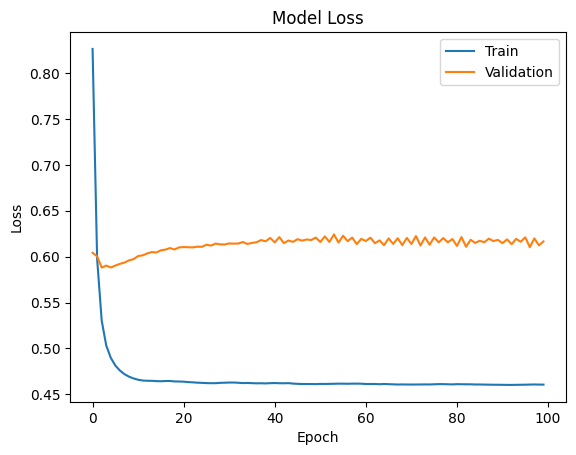

In [103]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [62]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten # Import Flatten
from tensorflow.keras.applications import VGG16

# Load the pre-trained model (e.g., VGG16)
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Instead of using 'add', create a new Functional model
x = pretrained_model.output
x = Flatten()(x)  # Flatten the output from the pretrained model
x = Dense(1, activation='sigmoid')(x)

# Create the new model
new_model = Model(inputs=pretrained_model.input, outputs=x)

# Freeze the initial layers (optional)
for layer in new_model.layers[:-1]:
    layer.trainable = False

# Compile the model
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Before training, ensure X_train is the correct shape:
# 1. Reshape X_train to (num_samples, 224, 224, 3)
# 2. Ensure X_train contains image data, not just features

# Assuming X_train_images is your NumPy array of images
# X_train_reshaped = X_train_status.reshape(-1, 224, 224, 3)

# new_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)

In [65]:
X_train_reshaped = X_train.reshape(-1, 224, 224, 3)

new_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)

ValueError: cannot reshape array of size 1111828 into shape (224,224,3)